In [29]:
import pandas as pd
import numpy as np

data = pd.read_csv('Dbig.txt', delimiter=' ', header=None)


In [30]:
np.random.seed(0)  
permutation = np.random.permutation(data.index)
train_indices = permutation[:8192]
test_indices = permutation[8192:]

train_data = data.iloc[train_indices]
test_data = data.iloc[test_indices]


In [31]:
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values


In [32]:
train_data.to_csv('train_data.txt', sep=' ', index=False, header=False)
test_data.to_csv('test_data.txt', sep=' ', index=False, header=False)


In [33]:
D32_indices = train_indices[:32]
D128_indices = train_indices[:128]
D512_indices = train_indices[:512]
D2048_indices = train_indices[:2048]
# D8192_indices = train_indices[:8192]  

D32 = data.iloc[D32_indices]
D128 = data.iloc[D128_indices]
D512 = data.iloc[D512_indices]
D2048 = data.iloc[D2048_indices]
D8192 = train_data  


In [34]:
X32 = D32.iloc[:, :-1].values
y32 = D32.iloc[:, -1].values

X128 = D128.iloc[:, :-1].values
y128 = D128.iloc[:, -1].values

X512 = D512.iloc[:, :-1].values
y512 = D512.iloc[:, -1].values

X2048 = D2048.iloc[:, :-1].values
y2048 = D2048.iloc[:, -1].values

X8192 = D8192.iloc[:, :-1].values
y8192 = D8192.iloc[:, -1].values


In [35]:
D32.to_csv('D32.txt', sep=' ', index=False, header=False)
D128.to_csv('D128.txt', sep=' ', index=False, header=False)
D512.to_csv('D512.txt', sep=' ', index=False, header=False)
D2048.to_csv('D2048.txt', sep=' ', index=False, header=False)
D8192.to_csv('D8192.txt', sep=' ', index=False, header=False)


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

results = {}

datasets = {
    "D32": (X32, y32),
    "D128": (X128, y128),
    "D512": (X512, y512),
    "D2048": (X2048, y2048),
    "D8192": (X8192, y8192)
}

for name, (X, y) in datasets.items():
    clf = DecisionTreeClassifier()
    clf.fit(X, y)

    n_nodes = clf.tree_.node_count

    y_pred = clf.predict(X_test)  
    errn = 1 - accuracy_score(y_test, y_pred)
    print(n_nodes)
    results[name] = (name[1:], n_nodes, errn)


11
21
59
121
249


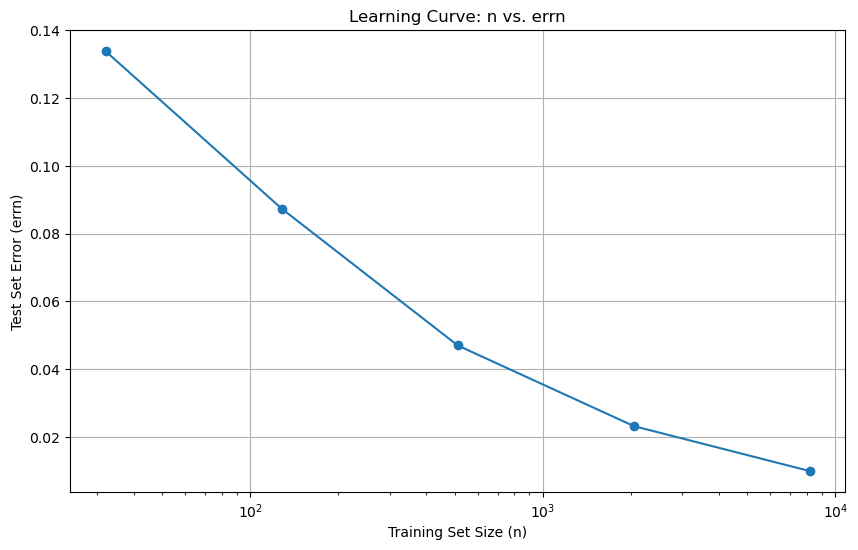

[32, 128, 512, 2048, 8192]
249
[0.1338495575221239, 0.08738938053097345, 0.04701327433628322, 0.023230088495575174, 0.009955752212389424]


In [37]:
import matplotlib.pyplot as plt

n_values = [int(result[0]) for result in results.values()]
errn_values = [result[2] for result in results.values()]

plt.figure(figsize=(10, 6))
plt.plot(n_values, errn_values, marker='o')
plt.title('Learning Curve: n vs. errn')
plt.xlabel('Training Set Size (n)')
plt.ylabel('Test Set Error (errn)')
plt.xscale('log')
plt.grid(True)
plt.savefig("learning_curve.png")
plt.show()

print(n_values)
print(errn_values)

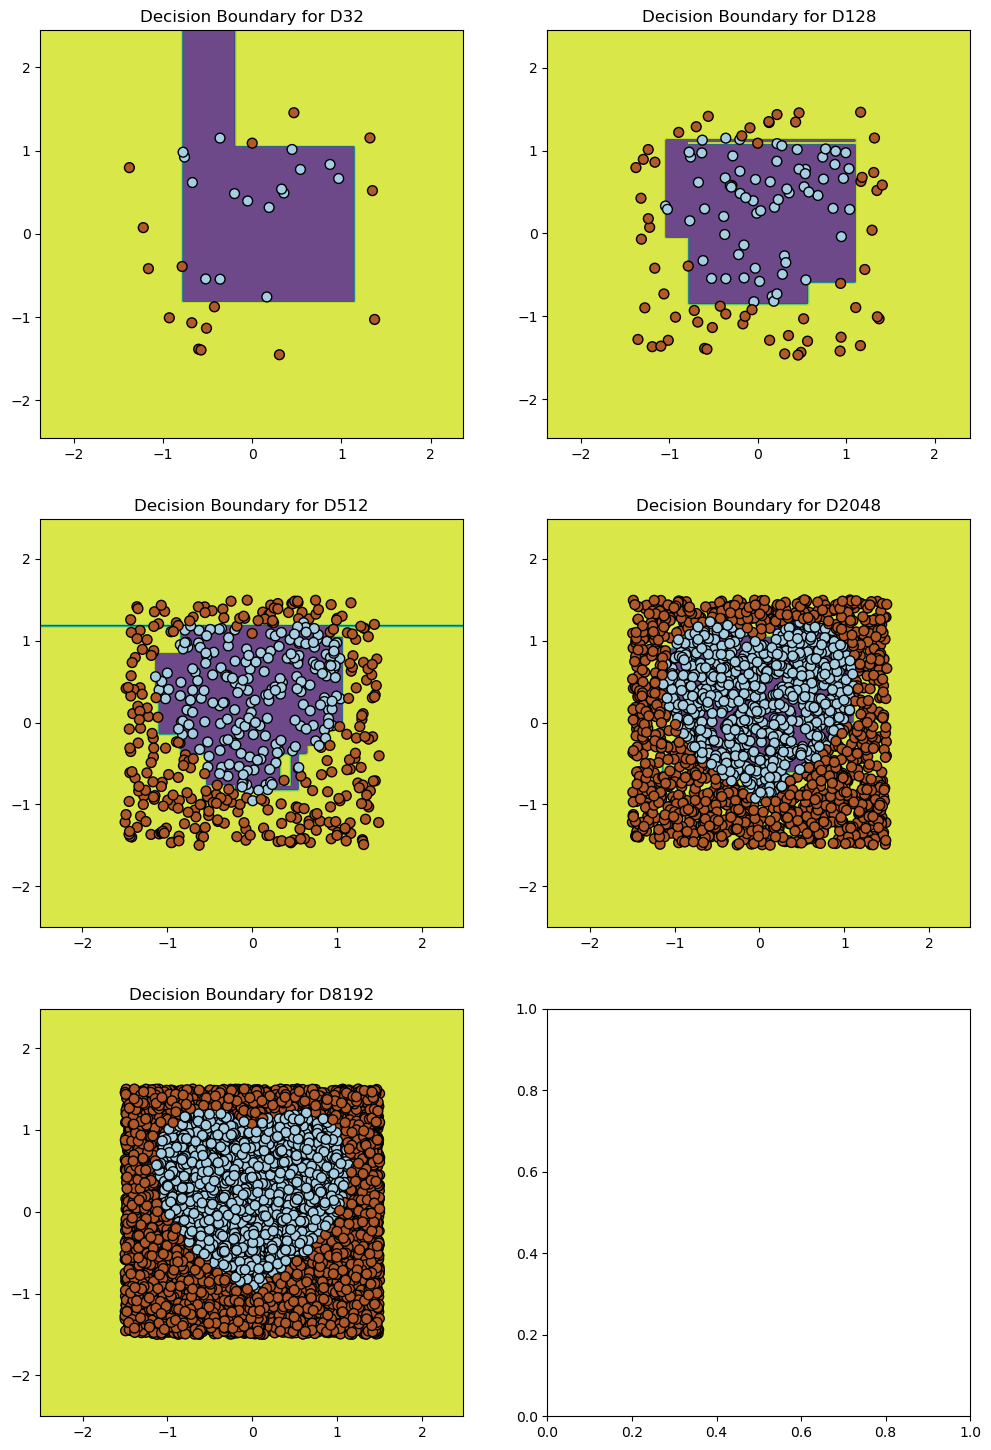

In [23]:
def plot_decision_boundary(clf, X, y, ax):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, linewidth=1, cmap=plt.cm.Paired)

fig, axs = plt.subplots(3, 2, figsize=(12, 18))

for idx, (name, (X, y)) in enumerate(datasets.items()):
    ax = axs.flatten()[idx]
    clf = DecisionTreeClassifier().fit(X, y)
    plot_decision_boundary(clf, X, y, ax)
    ax.set_title(f'Decision Boundary for {name}')
plt.savefig(f'decision_boundary_{name}.png')
plt.show()
